# Ejercicio Clase 03. Comparación modelo en Keras con modelo en Numpy.

Se compara el desempeño del modelo de la clase anterior (ver Notebook "Keritas") con la misma arquitectura entrenada en Keras (no son exactamente lo mismos parámetros de Optimizer).

<a href="https://colab.research.google.com/github/nhorro/ceai2020/blob/master/deep_learning/clase_3/EjercicioKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Si la versión de TF es 1.14.0 corresponde a la ejecución con Keras incluído en Tensorflow del docker: [tensorflow1.12-py3-jupyter-opencv](https://github.com/nhorro/tensorflow1.12-py3-jupyter-opencv)

In [2]:
print(tf.__version__)

1.14.0


## 1. Definición de modelo

Misma arquitectura del ejercicio de la clase anterior:

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


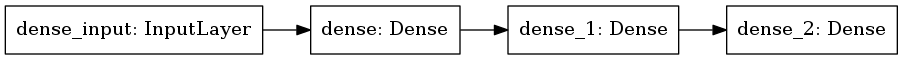

In [3]:
model = Sequential()
model.add(Dense(3, input_dim=2)) # input_dim son las variables de entrada
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) 
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False, rankdir="LR")

## 2. Carga de dataset y entrenamiento

In [4]:
import numpy as np
TRAIN_DATASET_FILENAME = "../clase_2/data/clase_2_train_data.csv"
TEST_DATASET_FILENAME = "../clase_2/data/clase_2_test_data.csv"

train_ds = np.genfromtxt(TRAIN_DATASET_FILENAME, skip_header=True, delimiter=',')
X_train = train_ds[:,0:2]
y_train = train_ds[:,2:]
test_ds = np.genfromtxt(TEST_DATASET_FILENAME, skip_header=True, delimiter=',')
X_test = test_ds[:,0:2]
y_test = test_ds[:,2:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 2), (900, 1), (100, 2), (100, 1))

In [ ]:
# No es exactamente el mismo optimizer
optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay=0.01, momentum=0.001, nesterov=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

num_epochs = 100
batch_size = 4
history = model.fit(X_train, y_train, nb_epoch=num_epochs, batch_size=batch_size, verbose=0)

epochs = np.arange(0,len(history.history['loss']))
plt.figure(figsize=(12,8))
plt.plot(epochs,history.history['loss'])
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.grid(which="both")
plt.title("Entrenamiento")
plt.show()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 3. Comparación con la implementación anterior en Numpy

In [ ]:
#!pip install seaborn
import sys
sys.path.append("../../intro_ai/")
from libintroia.utils import plot_confusion_matrix
from libintroia.metrics import Precision, Accuracy, Recall
metrics = [ Precision(), Accuracy(), Recall() ]

In [ ]:
predicted = model.predict(X_train)
predicted[predicted<=0.5] = False
predicted[predicted>0.5] = True
actual = y_train
plot_confusion_matrix(predicted, actual, "Training set")
print("Precision:", metrics[0](actual,predicted))
print("Accuracy:", metrics[1](actual,predicted))
print("Recall:", metrics[2](actual,predicted))

In [ ]:
predicted = model.predict(X_test)
predicted[predicted<=0.5] = False
predicted[predicted>0.5] = True
actual = y_test
plot_confusion_matrix(predicted, actual, "Test set")
print("Precision:", metrics[0](actual,predicted))
print("Accuracy:", metrics[1](actual,predicted))
print("Recall:", metrics[2](actual,predicted))